In [14]:
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#check the dataframe

url = 'https://static.data.gov.hk/covid-vaccine/bar_age.csv'
covid = pd.read_csv(url)
covid

,age_group,population,firstDose.sinovac,firstDose.biontech,firstDose.total,secondDose.sinovac,secondDose.biontech,secondDose.total,thirdDose.sinovac,thirdDose.biontech,thirdDose.total
0,Aged 3-11,527300,239312,63496,302808,50404,109,50513,24,1,25
1,Aged 12-19,448800,59839,369470,429309,41806,282476,324282,5292,34750,40042
2,Aged 20-29,808700,137481,605879,743360,122449,563082,685531,42140,156696,198836
3,Aged 30-39,1126300,288799,780420,1069219,254684,731407,986091,91299,309583,400882
4,Aged 40-49,1142500,457548,689260,1146808,417314,661451,1078765,177461,396974,574435
5,Aged 50-59,1174200,565901,567480,1133381,515179,542397,1057576,218335,362175,580510
6,Aged 60-69,1071800,561478,399087,960565,487225,375141,862366,199644,260117,459761
7,Aged 70-79,560500,300786,152861,453647,240679,140538,381217,89492,93868,183360
8,Aged 80 and above,401800,174641,51131,225772,112013,43041,155054,25457,21103,46560


In [16]:
#data exploratory
covid['sinovac'] = covid['firstDose.sinovac']/covid['population']*100
covid['biontech'] = covid['firstDose.biontech']/covid['population']*100
covid['non_vaccine'] = (1-(covid['firstDose.total']/covid['population']))*100

covid3 = covid[['age_group','non_vaccine','sinovac','biontech']]

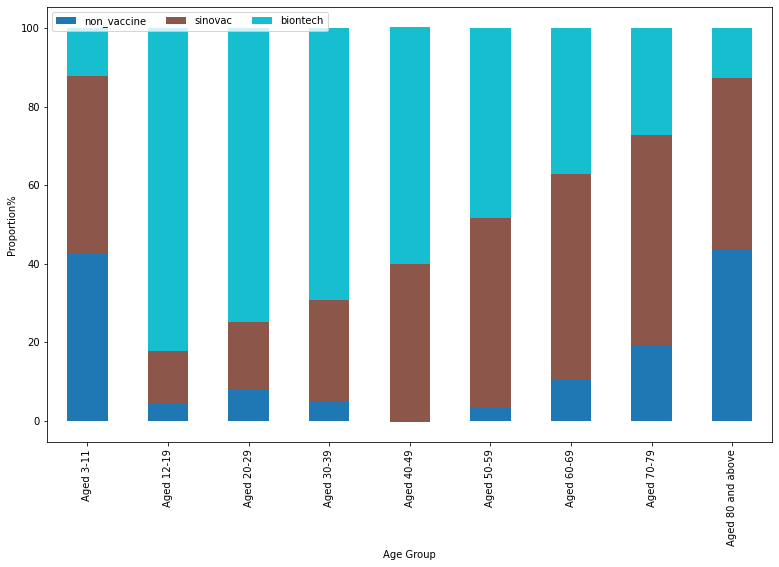

In [17]:
#stacked column chart
#showing total % split for each population group on age segment

covid3.plot(kind='bar', x = 'age_group',
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(13, 8))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Age Group")
plt.ylabel("Proportion%")
plt.show()

In [18]:
#check for non null

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_group            9 non-null      object 
 1   population           9 non-null      int64  
 2   firstDose.sinovac    9 non-null      int64  
 3   firstDose.biontech   9 non-null      int64  
 4   firstDose.total      9 non-null      int64  
 5   secondDose.sinovac   9 non-null      int64  
 6   secondDose.biontech  9 non-null      int64  
 7   secondDose.total     9 non-null      int64  
 8   thirdDose.sinovac    9 non-null      int64  
 9   thirdDose.biontech   9 non-null      int64  
 10  thirdDose.total      9 non-null      int64  
 11  sinovac              9 non-null      float64
 12  biontech             9 non-null      float64
 13  non_vaccine          9 non-null      float64
dtypes: float64(3), int64(10), object(1)
memory usage: 1.1+ KB


In [19]:
#plot graph

#traces 
trace1 = go.Scatter(
    x = covid.age_group, 
    y = covid['firstDose.sinovac'],
   # mode = "markers",  #default is line graph
    name = "sinovac"
)

trace2 = go.Scatter(
    x = covid.age_group, 
    y = covid['firstDose.biontech'],
   # mode = "markers",  #default is line graph
    name = "biontech"
)

data = [trace1, trace2]  #put in list
layout = go.Layout(height=600, width=1000)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [20]:
#significant preference of biontech over young segment, with peak at aged 30-39
#shift of pattern begin to occur at aged 50+, who preferred sinovac over biontech
#children vaccined sionvac more than biontech
#only first dose figures used for checking basic vaccine pattern

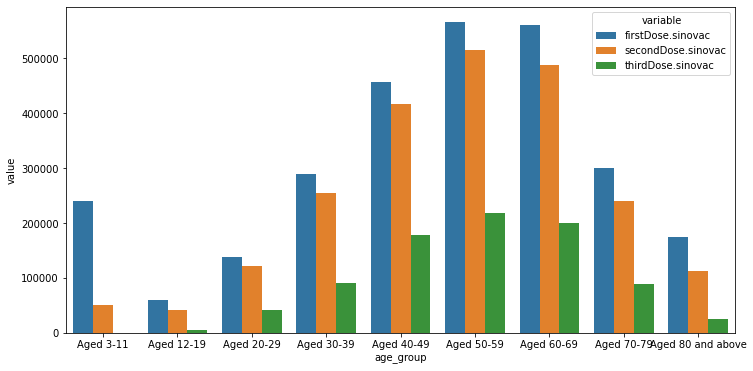

In [21]:
#study of sinovac vaccination

covid2 = pd.melt(covid,id_vars = ['age_group'],value_vars =['firstDose.sinovac','secondDose.sinovac', 'thirdDose.sinovac'])

plt.figure(figsize=(12,6))
my_plot = sns.barplot(x="age_group", y="value",hue = "variable", data=covid2)
plt.show()

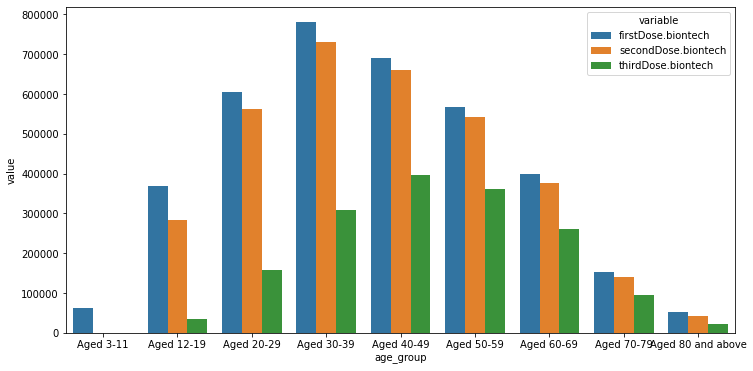

In [22]:
#study of biontech vaccination

covid3 = pd.melt(covid,id_vars = ['age_group'],value_vars =['firstDose.biontech','secondDose.biontech', 'thirdDose.biontech'])
plt.figure(figsize=(12,6))
my_plot = sns.barplot(x="age_group", y="value",hue = "variable", data=covid3)
plt.show()

In [23]:
#% of third dose is higher for target groups vaccined biontech
#some with first and second dose of sionvac shift to have biontech as 3rd dose